In [1]:
%matplotlib inline

import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)


# Classifier comparison

A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.


sklearn accuracy:  0.936
categorical_accuracy:  0.936
sklearn accuracy:  0.82
categorical_accuracy:  0.82
sklearn accuracy:  0.92
categorical_accuracy:  0.92
sklearn accuracy:  0.5
8/8 [==============================] - 0s 2ms/step
categorical_accuracy:  0.5
0.5 7
sklearn accuracy:  0.936
categorical_accuracy:  0.936
sklearn accuracy:  0.568
categorical_accuracy:  0.568
sklearn accuracy:  0.916
categorical_accuracy:  0.916
sklearn accuracy:  0.5
8/8 [==============================] - 0s 1ms/step
categorical_accuracy:  0.5
0.5 6
sklearn accuracy:  0.908
categorical_accuracy:  0.908
sklearn accuracy:  0.828
categorical_accuracy:  0.828
sklearn accuracy:  0.884
categorical_accuracy:  0.884
sklearn accuracy:  0.488
8/8 [==============================] - 0s 1ms/step
categorical_accuracy:  0.488
0.4880000054836273 6


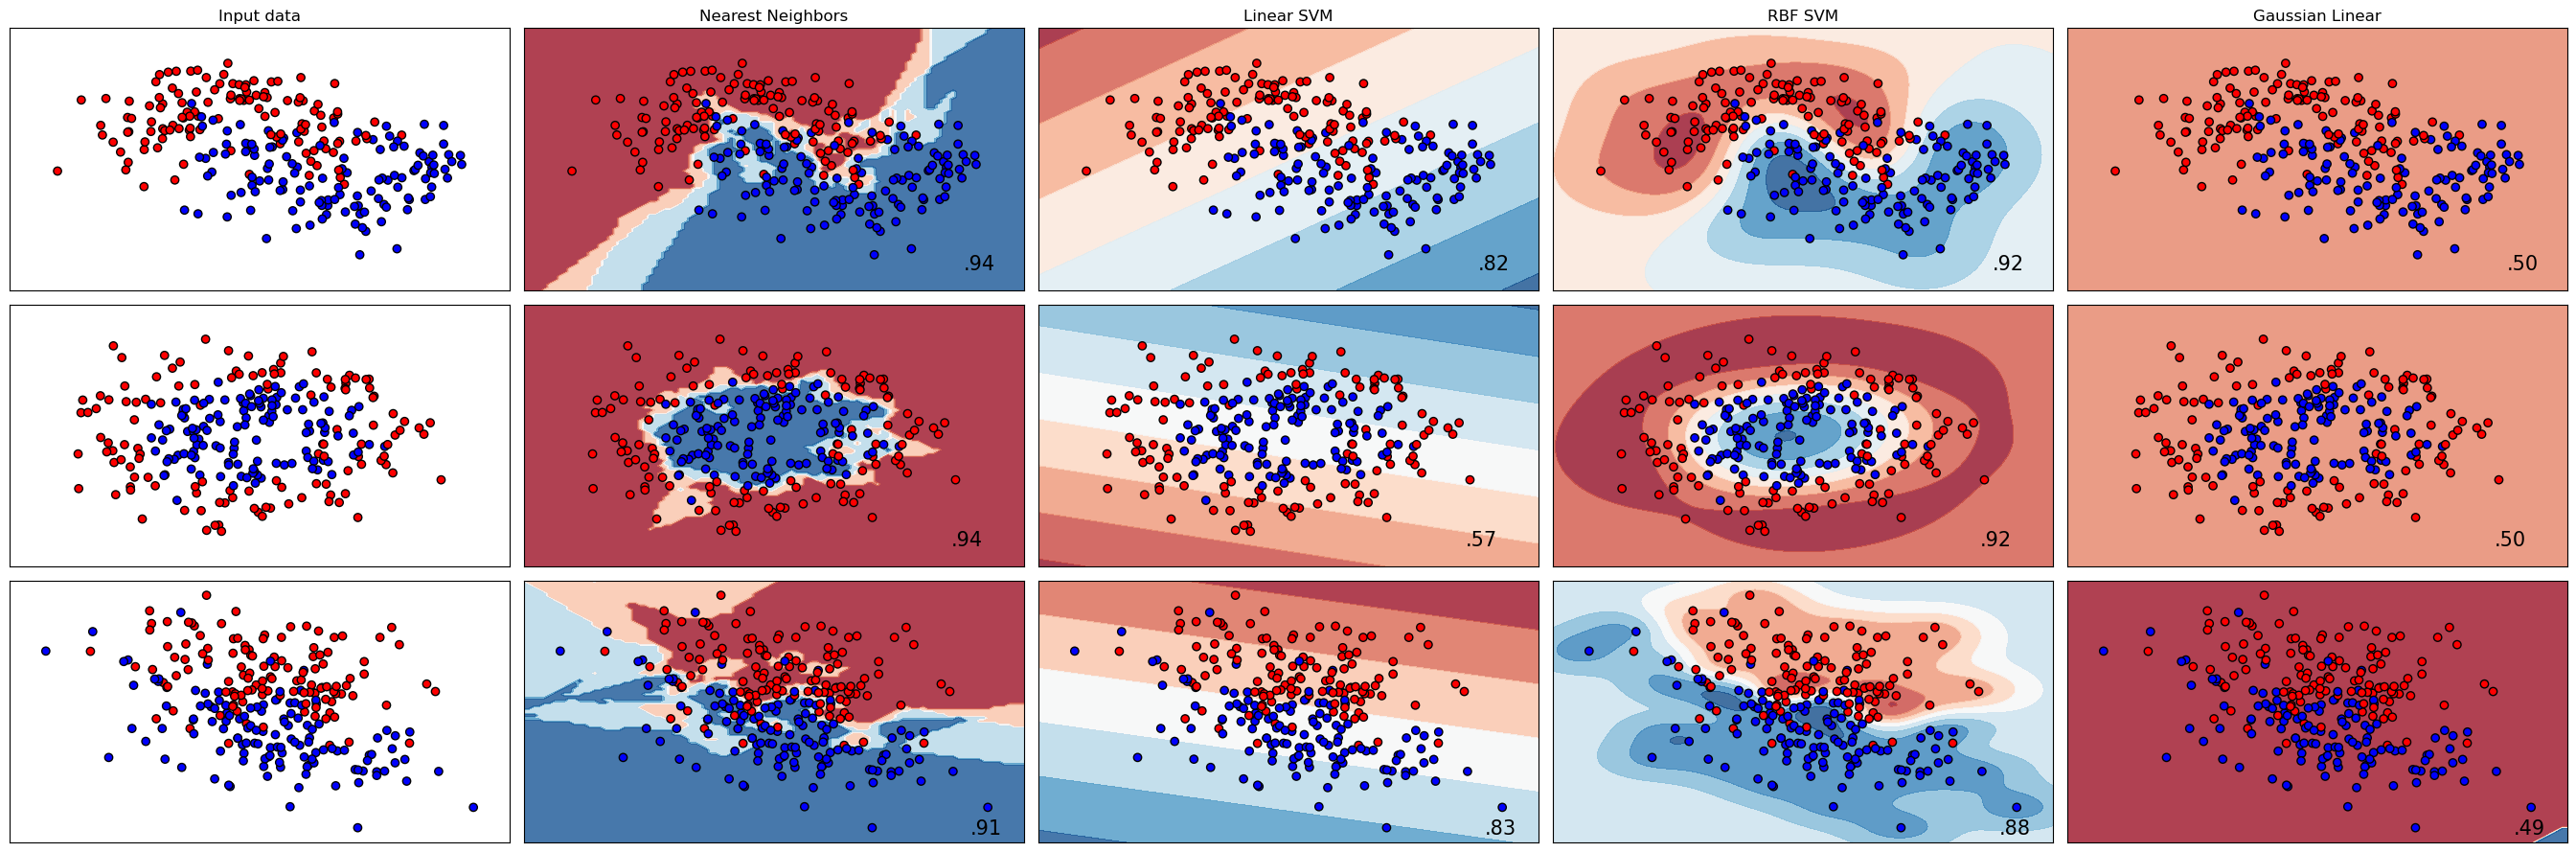

In [2]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from Keras import GaussianLinearClassifier, ANNClassifier
from tensorflow import keras


seed = 2
keras.utils.set_random_seed(seed)
keras.backend.clear_session()

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    # "Gaussian Process",
    # "Decision Tree",
    # "Random Forest",
    # "Neural Net",
    # "AdaBoost",
    # "Naive Bayes",
    # "QDA",
    "Gaussian Linear",
    # "Hard aNNE",
    # "Soft aNNE",
]

es = keras.callbacks.EarlyStopping(
    monitor="loss", patience=5, restore_best_weights=True
)

n_samples = 250 #2000

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    # DecisionTreeClassifier(max_depth=5),
    # RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    # MLPClassifier(alpha=1, max_iter=1000),
    # AdaBoostClassifier(),
    # GaussianNB(),
    # QuadraticDiscriminantAnalysis(),
    GaussianLinearClassifier(
        output_features=4096,
        epochs=100,
        keras_optimizer=keras.optimizers.Adam(learning_rate=1e-2),
        keras_callbacks=[es],
    ),
#     ANNClassifier(soft=False, t_samples=None, epochs=30, keras_callbacks=[es]),
#     ANNClassifier(soft=True, t_samples=None, epochs=30, keras_callbacks=[es]),
]

X, y = make_classification(
    n_samples=n_samples, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(seed)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(n_samples=n_samples, noise=0.3, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    # X_train, X_test, y_train, y_test = train_test_split(
    #     X, y, test_size=0.2, random_state=42
    # )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    # ax.scatter(
    #     X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    # )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    t_samples = [
        X[np.random.choice(X.shape[0], 2 ** ds_cnt, replace=False), :]
        for _ in range(256)
    ]

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        if name.endswith("aNNE"):
            clf.t_samples = t_samples

        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        # clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X, y)


        score = clf.score(X, y) # https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/base.py#L642
        print("sklearn accuracy: ", score)
        if name in [
            "Gaussian Linear",
            "Hard aNNE",
            "Soft aNNE",
            ]:
            score = keras.metrics.categorical_accuracy(tf.one_hot(y, 2), clf.keras_model_.predict(X))
        else:
            score = keras.metrics.categorical_accuracy(tf.one_hot(y, 2), tf.one_hot(clf.predict(X), 2))
        score = score.numpy().mean()
        print("categorical_accuracy: ", score)

        if name in [
            "Gaussian Linear",
            "Hard aNNE",
            "Soft aNNE",
            ]:
            print(
                clf.history_.history["categorical_accuracy"][-1],
                len(clf.history_.history["categorical_accuracy"]),
            )
            
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        # ax.scatter(
        #     X_test[:, 0],
        #     X_test[:, 1],
        #     c=y_test,
        #     cmap=cm_bright,
        #     edgecolors="k",
        #     alpha=0.6,
        # )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()


In [6]:
import random
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
from Keras import train_gaussian_linear, GaussianLinearClassifier

seed = 22
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)
keras.utils.set_random_seed(seed)
keras.backend.clear_session()

RandomFourierFeatures = keras.layers.experimental.RandomFourierFeatures

es = keras.callbacks.EarlyStopping(
    monitor="loss", patience=5, restore_best_weights=True
)

X, y = datasets[0]

# X, y = make_moons(noise=0.3, random_state=0)
# X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

model = keras.Sequential(
    [
        keras.Input(shape=(2,)),
        RandomFourierFeatures(
            output_dim=4096, kernel_initializer="gaussian", trainable=True
        ),
        layers.Dense(units=2, activation="tanh"),
    ]
)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-2),
    loss="hinge",
    metrics=["categorical_accuracy"],
)

tf.keras.utils.plot_model(model, to_file='model_1.png', show_shapes=True)

history = model.fit(X, y, epochs=100, callbacks=[es], verbose=1)

print(
    history.history["categorical_accuracy"][-1],
    len(history.history["categorical_accuracy"]),
)

keras.utils.set_random_seed(seed)
keras.backend.clear_session()

model = GaussianLinearClassifier(
    output_features=4096,
    epochs=100,
    keras_optimizer=keras.optimizers.Adam(learning_rate=1e-2),
    keras_callbacks=[es],
    verbose=1,
)
model.fit(X, y)
model.verbose = 0

tf.keras.utils.plot_model(model.keras_model_, to_file='model_2.png', show_shapes=True)
history = model.history_

print(
    history.history["categorical_accuracy"][-1],
    len(history.history["categorical_accuracy"]),
)

print(model.score(X, y))
print(keras.metrics.categorical_accuracy(tf.one_hot(y, 2), model.keras_model_.predict(X)).numpy().mean())

from sklearn.metrics import f1_score
print(f1_score(y, model.predict(X), average="macro"))

Epoch 1/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5408 - categorical_accuracy: 0.6880
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4352 - categorical_accuracy: 0.7040
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4251 - categorical_accuracy: 0.7200
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3788 - categorical_accuracy: 0.9000
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3504 - categorical_accuracy: 0.9760
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3659 - categorical_accuracy: 0.9800
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3703 - categorical_accuracy: 0.9800
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3470 - categorical_accuracy: 1.0000
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3746 - categorical_accuracy: 1.0000
Epoch 10/100
8/8 [=